# Apple, Inc. (AAPL) - Random Forest Regressor:

---------


###  Overview: 
- 1) Importing the data.
- 2) Data Preprocessing.
- 3) Normalizing the data.
- 4) Modeling.

---------

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys

sys.path.append('..')

-----

## Company Name

In [2]:
company_name = 'Apple'

---

## Importing the Data:

In [3]:
from lib.helper import data_importer

In [4]:
df = data_importer(company_name)

In [5]:
df.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


-------

## Importing the Shifted Data Set:

In [6]:
from lib.helper import df_shift_importer

In [7]:
df_shift = df_shift_importer(company_name)

In [8]:
df_shift.head()

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07
1981-04-20,25.12,25.12,25.00,25.00,106600.0,0.0,1.0,0.369335,0.369335,0.367570,...,27.038054,27.038054,383685.301297,0.0,1.0,0.398549,0.399838,0.397535,0.397535,2.148638e+07
1981-04-21,25.75,25.87,25.75,25.75,157800.0,0.0,1.0,0.378597,0.380362,0.378597,...,27.008099,27.008099,378432.154755,0.0,1.0,0.398085,0.399385,0.397095,0.397095,2.119220e+07
1981-04-22,27.50,27.62,27.50,27.50,127400.0,0.0,1.0,0.404327,0.406092,0.404327,...,27.019539,27.019539,372594.197668,0.0,1.0,0.398231,0.399541,0.397263,0.397263,2.086528e+07


### Taking a Look at the Time-Shifted Data Set:

In [9]:
df_shift.tail(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-23,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,...,169.691723,171.097703,3.358258e+07,0.000518,1.0,171.126419,172.657153,169.671634,171.077463,3.358258e+07
2018-03-26,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,...,169.581218,170.954500,3.373761e+07,0.000506,1.0,171.062781,172.593499,169.561596,170.934731,3.373761e+07
2018-03-27,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,...,169.508167,170.996721,3.379657e+07,0.000494,1.0,170.993182,172.605278,169.489000,170.977412,3.379657e+07


-------

# Splitting the Data into a Training and Testing Set

In [10]:
from lib.helper import import_split_data

### Splitting the Data into a Train and Test Set:

In [11]:
X_train, X_test = import_split_data(company_name)

### Taking a Look at the Train Set:

In [12]:
X_train.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07


### Taking a Look at the Test Set:

In [13]:
X_test.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.65,117.20,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,...,110.936682,111.809549,3.262264e+07,0.006808,1.0,109.969134,110.881942,109.289159,110.149132,3.262266e+07
2017-01-04,115.80,116.33,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,...,111.025596,111.910490,3.253332e+07,0.006650,1.0,110.071473,110.975226,109.383424,110.255324,3.253334e+07


-----

# Normalizing the Data with a MinMaxScaler

In [14]:
from lib.helper import mm_scaler

In [15]:
X_train_sc, X_test_sc, y_train, y_test = mm_scaler(X_train, X_test, df)

-----

# Random Forest Regression Model

## Setting up the Random Forest (RF) Regressor:

In [16]:
def rf_model(X_train, y_train, X_test, y_test, n_estimators, max_depth, min_samples_leaf, bootstrap):
    """
    Returns the fitted model using the Random Forest Regressor Model from SK-Learn.
    Prints the Training Score, Testing score, & the average price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not. 
    
    Bagging Regressor Parameters
    -------------------------------------------------------------------------------------------------------------
    
    n_estimators : int
        Passes the number of estimators to be used in the Bagging Regressor Model.  
    
    max_depth : int
    
    min_leaf_samples : int
        Passes the maximum number of samples to be used in the Bagging Regressor Model.    
    
    bootstrap : boolean
        Passes boolean condition be used in the Bagging Regressor Model. >> True or False     
    """
    
    # Instatiating the Random Forest Regresssor.
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                           min_samples_leaf=min_samples_leaf, bootstrap=bootstrap, 
                           n_jobs=3, random_state=42)
    
    # Fitting the Training and Holdout using the Random Forest Regressor.
    rf.fit(X_train, y_train)
    # Scoring the Training Sets.
    train_score = rf.score(X_train, y_train)
    # Scoring the Test Sets.
    test_score = rf.score(X_test, y_test)
    # Getting the Average Predictions.
    prediction = rf.predict(X_test).mean()
    # Plotting the Actual and Predicted Prices.
    plt.scatter(y_test, rf.predict(X_test))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {prediction}') 
    return rf

### Random Forest Regression Model:

Train Score: 0.9980309556999277
Test Score: -2.825346518777106
Predictive Mean: 179.61515994246955


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

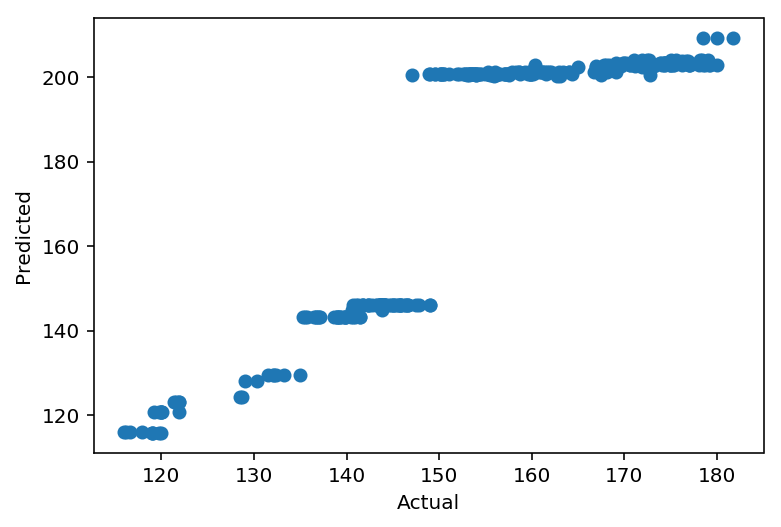

In [33]:
rf_model(X_train_sc, y_train, X_test_sc, y_test, 
         n_estimators=100, max_depth=15, 
         min_samples_leaf= 15, bootstrap=False)

-----

## Decomposing Signal Components with Principal Component Analysis (PCA):

In [34]:
from lib.helper import pca_decomposition

In [29]:
X_train_pca, X_test_pca = pca_decomposition(X_train_sc, X_test_sc, 2)

Train Score: 0.9938805667742192
Test Score: -2.3242951922466637
Predictive Mean: 128.95814929703522


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

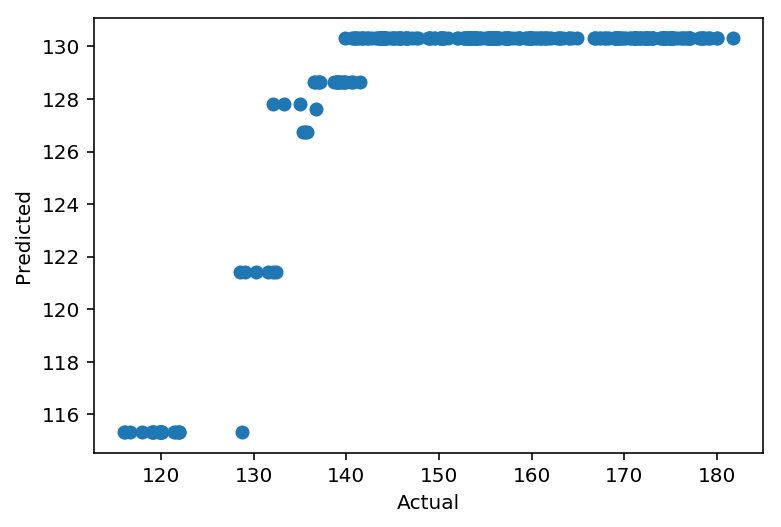

In [35]:
rf_model(X_train_pca, y_train, X_test_pca, y_test, 
         n_estimators=100, max_depth=10, 
         min_samples_leaf= 8, bootstrap=False)

-----

# Grid Searching a Random Forest Regression Model:

In [21]:
from sklearn.model_selection import GridSearchCV

### Creating a Pipeline

In [22]:
pipe = Pipeline([
    ('rf', RandomForestRegressor())
])

### Setting up the Parameters:

In [3]:
# Number of trees to consider in random forest
n_estimators = [x for x in range(8, 14, 2)]

# Number of features to consider at every split
max_features = ['auto', 'log2']

# Maximum number of levels in tree to consider
max_depth = [x for x in range(1, 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [x for x in range(1, 3)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [4]:
params = {'rf__n_estimators': n_estimators,
           'rf__max_features': max_features,
           'rf__max_depth': max_depth,
           'rf__min_samples_split': min_samples_split,
           'rf__min_samples_leaf': min_samples_leaf,
           'rf__bootstrap': bootstrap}
print(params)

{'rf__n_estimators': [8, 10, 12], 'rf__max_features': ['auto', 'log2'], 'rf__max_depth': [1, 2, None], 'rf__min_samples_split': [1, 2], 'rf__min_samples_leaf': [1, 2], 'rf__bootstrap': [True, False]}


### Gridsearching the Parameters:

In [25]:
rf_search = GridSearchCV(pipe, params, n_jobs=3)

### Fitting the Scaled Data with the Model:

In [31]:
# rf_search.fit(X_train_sc, y_train)

### Scoring the Training Data:

In [ ]:
rf_search.score(X_train_sc, y_train)

### Scoring the Test Data

In [ ]:
rf_search.score(X_test_sc, y_test)

In [ ]:
plt.scatter(y_test, rf_search.predict(X_test_sc))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
coef_weights = pd.DataFrame(rf_search.coef_, index=X_train.columns, columns=['weight'])
coef_weights.sort_values('weight').tail()

-  => `n_estimators=10, `


-  => `max_features='auto',`


-  => `max_depth=None,`


-  => `min_samples_split=2,`


-  => `min_samples_leaf=1,`


-  => `bootstrap=True,`

--------

## GridSearching a Random Forest with PCA Decomposition:

In [ ]:
pipe_w = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestRegressor())
])

### Setting the Params

In [1]:
# Number of trees in random forest
n_estimators_w = [x for x in range(8, 14, 2)]

# Number of features to consider at every split
max_features_w = ['auto', 'log2']

# Maximum number of levels in tree
max_depth_w = [x for x in range(1, 3)]
max_depth_w.append(None)

# Minimum number of samples required to split a node
min_samples_split_w = [x for x in range(1, 5)]

# Minimum number of samples required at each leaf node
min_samples_leaf_w = [x for x in range(1, 3)]

# Method of selecting samples for training each tree
bootstrap_w = [True, False]

# pca_n_components= [x for x in range(2, 24, 4)]

# pca_svd_solver = ['auto', 'full', 'arpack', 'randomized']

### Setting up the Parameters with PCA Weights:

In [2]:
params_w = {'rf__n_estimators': n_estimators_w,
          'rf__max_features': max_features_w,
          'rf__max_depth': max_depth_w,
          'rf__min_samples_split': min_samples_split_w,
          'rf__min_samples_leaf': min_samples_leaf_w,
          'rf__bootstrap': bootstrap_w}
print(params_w)

{'rf__n_estimators': [8, 10, 12], 'rf__max_features': ['auto', 'log2'], 'rf__max_depth': [1, 2, None], 'rf__min_samples_split': [1, 2, 3, 4], 'rf__min_samples_leaf': [1, 2], 'rf__bootstrap': [True, False]}


### Gridsearching the Parameters with PCA:

In [ ]:
grid = GridSearchCV(pipe_w, params_w, n_jobs=3)

### Fitting the Scaled Data with a Weighted Model:

In [ ]:
grid.fit(X_train_sc, y_train)

### Scoring the Training Data:

In [ ]:
grid.score(X_train_sc, y_train)

### Scoring the Test Data:

In [ ]:
grid.score(X_test_sc, y_test)

In [ ]:
plt.scatter(y_test, grid.predict(X_test_sc))
plt.xlabel('Actual')
plt.ylabel('Predicted')